# Random Walk #

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.special as sc


In [4]:
# De parameters
N=10        # totaal aantal stappen
n1=3        # aantal stappen naar rechts
n2=N-n1     # aantal stappen naar links
p=0.5       # kans voor stap naar rechts
q=1.0-p     # kans voor stap naar links


## 1. Waarschijnlijkheidsverdeling ##

In [19]:
min_n1=-10
max_n1=20
nsteps=max_n1-min_n1+1  #+1 want er is altijd 1 gridpunt meer dan er stappen in een grid zijn
Xcoord=np.linspace(min_n1,max_n1,nsteps) # maak een reeks van n1 waarden gaande van

Ycoord=np.zeros(nsteps)
for i in range(nsteps):
    Ycoord[i]+=sc.binom(N,Xcoord[i])*(p**Xcoord[i])*(q**(N-Xcoord[i]))

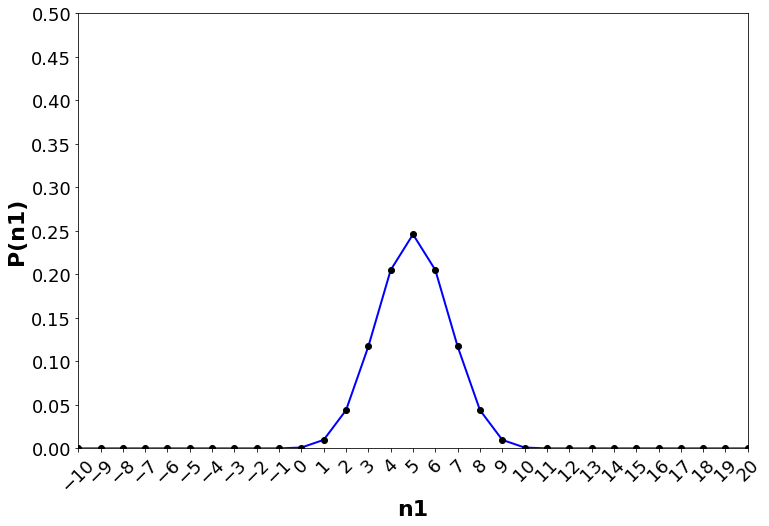

In [20]:
#En dit nu mooi plotten
plt.figure(figsize=(12,8))
#for yPred in all_yPred:
#    plt.plot(xPred, yPred,   color='red'  ,linewidth=1, zorder=-1, alpha=0.25)

#plt.fill_between(xPred.ravel(), CIlow, CIhigh, color='blue', zorder=0, alpha=.5)
plt.plot(Xcoord, Ycoord,  color='blue',linewidth=2, zorder=0)
plt.scatter(Xcoord, Ycoord,  color='black', zorder=1)

plt.axis([min_n1,max_n1,0,0.5])
plt.xticks(Xcoord,rotation=45,fontsize=18)
Ylst=np.linspace(0,0.5,11)
plt.yticks(Ylst,fontsize=18)
plt.xlabel("n1",fontsize=22,fontweight="bold")
plt.ylabel("P(n1)",fontsize=22,fontweight="bold")

plt.show()


## 2. Evolutie waarschijnlijkheidsverdeling ##
Hoe verandert de waarschijnlijkheidsverdeling bij verandering van N?

In [23]:
min_n1=-10
max_n1=20
nsteps=max_n1-min_n1+1  #+1 want er is altijd 1 gridpunt meer dan er stappen in een grid zijn
Xcoord=np.linspace(min_n1,max_n1,nsteps) # maak een reeks van n1 waarden gaande van

min_N=5
max_N=20
numN=max_N-min_N+1
Nlist=np.linspace(min_N,max_N,numN)

Ycoord=np.zeros((numN,nsteps))
for iN in range(numN): #+1: python neemt de bovengrens niet mee
    N=iN+min_N # iN is de index in de lijst, begint bij 0, N is dan de echte "N-waarde"
    for i in range(nsteps):
        Ycoord[iN,i]+=sc.binom(N,Xcoord[i])*(p**Xcoord[i])*(q**(N-Xcoord[i]))

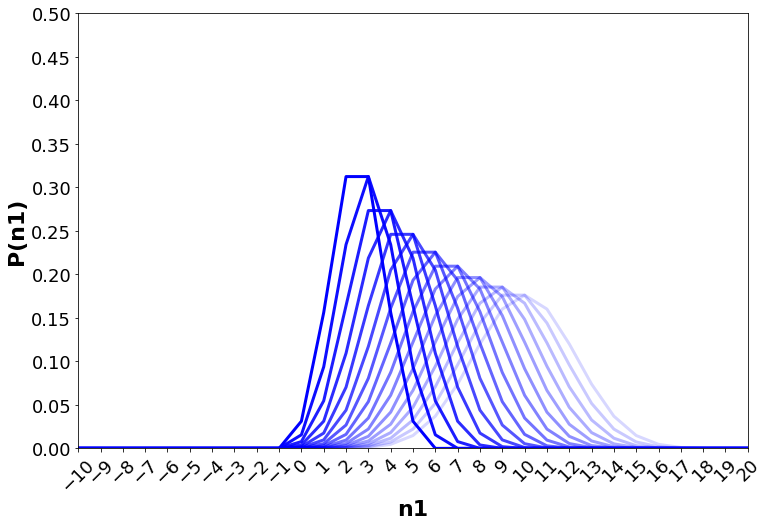

In [26]:
#En dit nu mooi plotten
plt.figure(figsize=(12,8))
for iN in range(numN):
    Yc=Ycoord[iN]
    plt.plot(Xcoord, Yc,   color='blue'  ,linewidth=3, zorder=-1, alpha=(1.0-0.9*(iN/numN)))

plt.axis([min_n1,max_n1,0,0.5])
plt.xticks(Xcoord,rotation=45,fontsize=18)
Ylst=np.linspace(0,0.5,11)
plt.yticks(Ylst,fontsize=18)
plt.xlabel("n1",fontsize=22,fontweight="bold")
plt.ylabel("P(n1)",fontsize=22,fontweight="bold")

plt.show()